# Data Analysis

## Regression modeling

A general, primary goal of many statistical data analysis tasks is to relate the influence of one variable on another. For example, we may wish to know how different medical interventions influence the incidence or duration of disease, or perhaps a how baseball player's performance varies as a function of age.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import fmin

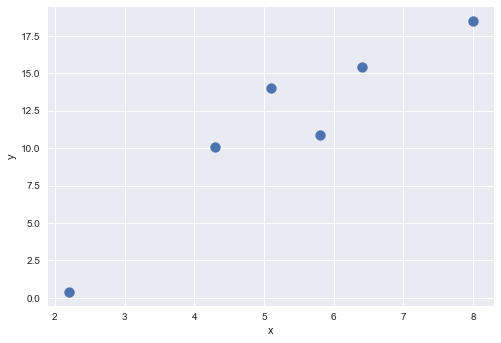

In [2]:
data = pd.DataFrame({'x':np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0]),
                    'y':np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])})
data.plot.scatter('x', 'y', s=100)

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

<div style="font-size: 150%;">  
$y_i = f(x_i) + \epsilon_i$
</div>

where $f$ is some function, for example a linear function:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

and $\epsilon_i$ accounts for the difference between the observed response $y_i$ and its prediction from the model $\hat{y_i} = \beta_0 + \beta_1 x_i$. This is sometimes referred to as **process uncertainty**.

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between $\hat{y}$ and $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: (1) to prevent positive and negative values from cancelling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model.

In [3]:
sum_of_squares = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2)

In [4]:
sum_of_squares([0,1], data.x, data.y)

333.35000000000002

In [5]:
b0,b1 = fmin(sum_of_squares, [0,1], args=(data.x, data.y))
b0,b1

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(-4.3500136038870876, 3.0000002915386412)

(0, 20)

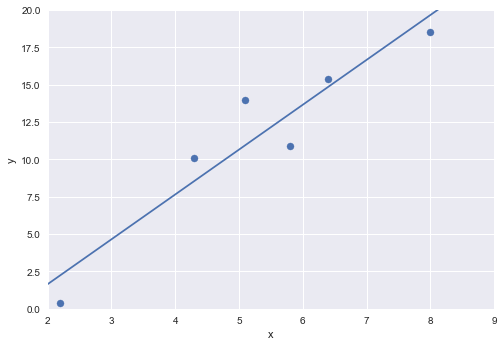

In [6]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])
axes.set_xlim(2, 9)
axes.set_ylim(0, 20)

(0, 20)

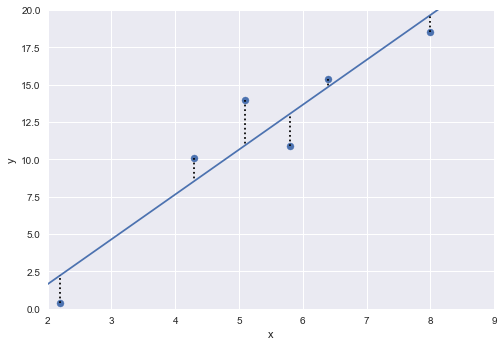

In [9]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])
for i,(xi, yi) in data.iterrows():
    axes.plot([xi]*2, [yi, b0+b1*xi], 'k:')
axes.set_xlim(2, 9)
axes.set_ylim(0, 20)

Minimizing the sum of squares is not the only criterion we can use; it is just a very popular (and successful) one. For example, we can try to minimize the sum of absolute differences:

In [10]:
sum_of_absval = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77

intercept: 0.0016, slope: 2.3


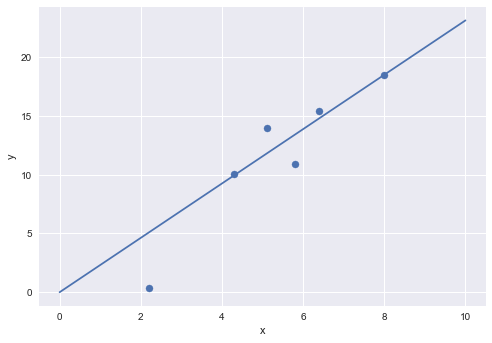

In [11]:
b0,b1 = fmin(sum_of_absval, [0,1], args=(data.x,data.y))
print('\nintercept: {0:.2}, slope: {1:.2}'.format(b0,b1))
axes = data.plot.scatter('x', 'y', s=50)
axes.plot([0,10], [b0, b0+b1*10])

We are not restricted to a straight-line regression model; we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>

In [12]:
sum_squares_quad = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2)) ** 2)

Optimization terminated successfully.
         Current function value: 14.001110
         Iterations: 198
         Function evaluations: 372

intercept: -1.1e+01, x: 6.1, x2: -0.3


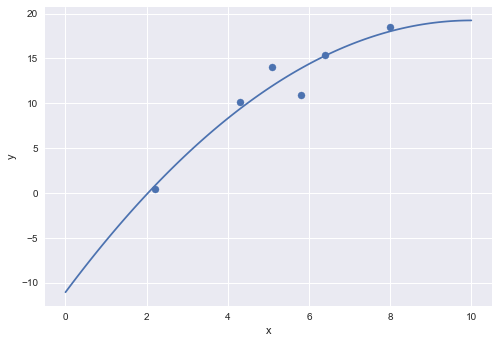

In [13]:
b0,b1,b2 = fmin(sum_squares_quad, [1,1,-1], args=(data.x, data.y))
print('\nintercept: {0:.2}, x: {1:.2}, x2: {2:.2}'.format(b0,b1,b2))
axes = data.plot.scatter('x', 'y', s=50)
xvals = np.linspace(0, 10, 100)
axes.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

Although polynomial model characterizes a nonlinear relationship, it is a linear problem in terms of estimation. That is, the regression model $f(y | x)$ is linear in the parameters.

For some data, it may be reasonable to consider polynomials of order>2. For example, consider the relationship between the number of home runs a baseball player hits and the number of runs batted in (RBI) they accumulate; clearly, the relationship is positive, but we may not expect a linear relationship.

In [14]:
sum_squares_cubic = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x - theta[2]*(x**2) 
                                  - theta[3]*(x**3)) ** 2)

In [15]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Optimization terminated successfully.
         Current function value: 41.134432
         Iterations: 298
         Function evaluations: 497


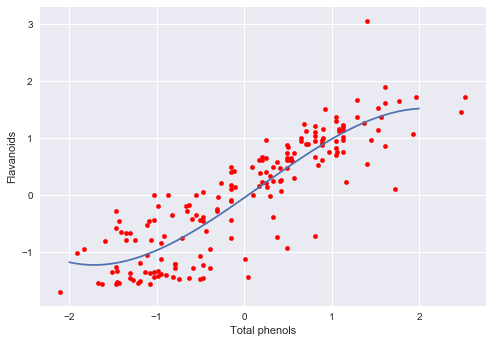

In [16]:
axes = wine.plot.scatter('Total phenols', 'Flavanoids', c='red')
phenols, flavanoids = wine[['Total phenols', 'Flavanoids']].T.values
b0,b1,b2,b3 = fmin(sum_squares_cubic, [0,1,-1,0], args=(phenols, flavanoids))
xvals = np.linspace(-2, 2)
axes.plot(xvals, b0 + b1*xvals + b2*(xvals**2) + b3*(xvals**3))

In practice, we need not fit least squares models by hand because they are implemented generally in packages such as [`scikit-learn`](http://scikit-learn.org/) and [`statsmodels`](https://github.com/statsmodels/statsmodels/). For example, `scikit-learn` package implements least squares models in its `LinearRegression` class:

In [17]:
from sklearn import linear_model

straight_line = linear_model.LinearRegression()
straight_line.fit(data.x.reshape(-1, 1), data.y)

C:\Anaconda3\envs\ngcm2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
straight_line.coef_

array([ 3.])

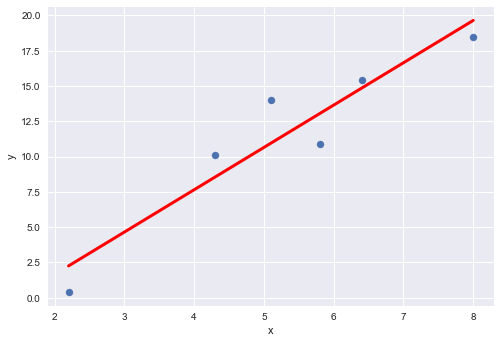

In [19]:
axes = data.plot.scatter('x', 'y', s=50)
axes.plot(data.x, straight_line.predict(data.x[:, np.newaxis]), color='red',
         linewidth=3)

For more general regression model building, its helpful to use a tool for describing statistical models, called `patsy`. With `patsy`, it is easy to specify the desired combinations of variables for any particular analysis, using an "R-like" syntax. `patsy` parses the formula string, and uses it to construct the approriate *design matrix* for the model.

For example, the quadratic model specified by hand above can be coded as:

In [20]:
from patsy import dmatrix

X = dmatrix('phenols + I(phenols**2) + I(phenols**3)')
pd.DataFrame(X).head()

,0,1,2,3
0,1.0,0.81,0.6561,0.531441
1,1.0,0.57,0.3249,0.185193
2,1.0,0.81,0.6561,0.531441
3,1.0,2.48,6.1504,15.252992
4,1.0,0.81,0.6561,0.531441


The `dmatrix` function returns the design matrix, which can be passed directly to the `LinearRegression` fitting method.

In [21]:
poly_line = linear_model.LinearRegression(fit_intercept=False)
poly_line.fit(X, flavanoids)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [22]:
poly_line.coef_

array([-0.0477075 ,  1.07353221,  0.05461979, -0.10038996])

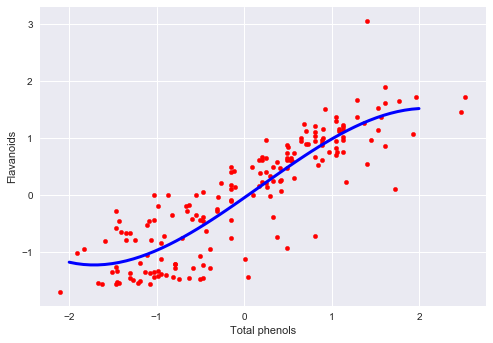

In [23]:
axes = wine.plot.scatter('Total phenols', 'Flavanoids', c='red')
axes.plot(xvals, poly_line.predict(dmatrix('xvals + I(xvals**2) + I(xvals**3)')), color='blue',
         linewidth=3)

## Logistic Regression

Fitting a line to the relationship between two variables using the least squares approach is sensible when the variable we are trying to predict is continuous, but what about when the data are dichotomous?

- male/female
- pass/fail
- died/survived

Let's consider the problem of predicting survival in the Titanic disaster, based on our available information. For example, lets say that we want to predict survival as a function of the fare paid for the journey.

In [24]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.name.head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

C:\Anaconda3\envs\ngcm2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


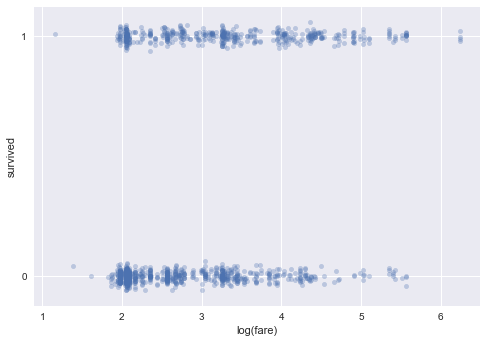

In [25]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(logfar=np.log(titanic.fare), surv_jit=titanic.survived + jitter)
         .plot.scatter('logfar', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)');

I have added random jitter on the y-axis to help visualize the density of the points, and have plotted fare on the log scale.

Clearly, fitting a line through this data makes little sense, for several reasons. First, for most values of the predictor variable, the line would predict values that are not zero or one. Second, it would seem odd to choose least squares (or similar) as a criterion for selecting the best line.

In [26]:
x = np.log(titanic.fare[titanic.fare>0])
y = titanic.survived[titanic.fare>0]
betas_titanic = fmin(sum_of_squares, [1,1], args=(x,y))

Optimization terminated successfully.
         Current function value: 277.621917
         Iterations: 55
         Function evaluations: 103


C:\Anaconda3\envs\ngcm2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


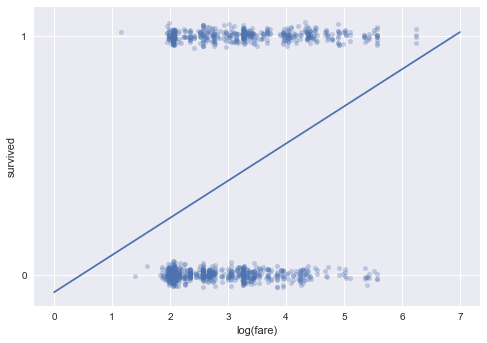

In [27]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(logfar=np.log(titanic.fare), surv_jit=titanic.survived + jitter)
         .plot.scatter('logfar', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)')

axes.plot([0,7], [betas_titanic[0], betas_titanic[0] + betas_titanic[1]*7.])

If we look at this data, we can see that for most values of `fare`, there are some individuals that survived and some that did not. However, notice that the cloud of points is denser on the "survived" (`y=1`) side for larger values of fare than on the "died" (`y=0`) side.

### Stochastic model

Rather than model the binary outcome explicitly, it makes sense instead to model the *probability* of death or survival in a **stochastic** model. Probabilities are measured on a continuous [0,1] scale, which may be more amenable for prediction using a regression line. We need to consider a different probability model for this exerciese however; let's consider the **Bernoulli** distribution as a generative model for our data:

<div style="font-size: 120%;">  
$$f(y|p) = p^{y} (1-p)^{1-y}$$ 
</div>  

where $y = \{0,1\}$ and $p \in [0,1]$. So, this model predicts whether $y$ is zero or one as a function of the probability $p$. Notice that when $y=1$, the $1-p$ term disappears, and when $y=0$, the $p$ term disappears.

So, the model we want to fit should look something like this:

<div style="font-size: 120%;">  
$$p_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

However, since $p$ is constrained to be between zero and one, it is easy to see where a linear (or polynomial) model might predict values outside of this range. We can modify this model sligtly by using a **link function** to transform the probability to have an unbounded range on a new scale. Specifically, we can use a **logit transformation** as our link function:

<div style="font-size: 120%;">  
$$\text{logit}(p) = \log\left[\frac{p}{1-p}\right] = x$$
</div>

Here's a plot of $p/(1-p)$

C:\Anaconda3\envs\ngcm2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


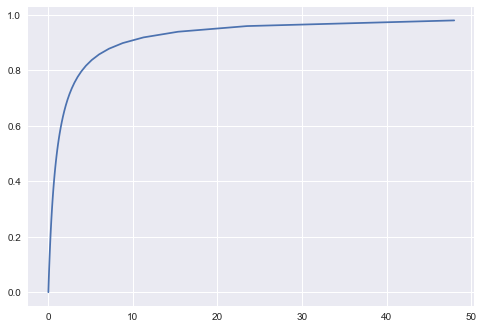

In [28]:
logit = lambda p: np.log(p/(1.-p))
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)

And here's the logit function:

C:\Anaconda3\envs\ngcm2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\ngcm2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


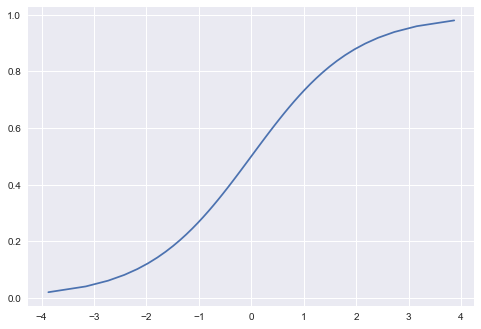

In [29]:
plt.plot(logit(unit_interval), unit_interval)

The inverse of the logit transformation is:

<div style="font-size: 150%;">  
$$p = \frac{1}{1 + \exp(-x)}$$
</div>

In [30]:
invlogit = lambda x: 1. / (1 + np.exp(-x))

So, now our model is:

<div style="font-size: 120%;">  
$$\text{logit}(p_i) = \beta_0 + \beta_1 x_i + \epsilon_i$$
</div>

We can fit this model using maximum likelihood. Our likelihood, again based on the Bernoulli model is:

<div style="font-size: 120%;">  
$$L(y|p) = \prod_{i=1}^n p_i^{y_i} (1-p_i)^{1-y_i}$$
</div>

which, on the log scale is:

<div style="font-size: 120%;">  
$$l(y|p) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
</div>

We can easily implement this in Python, keeping in mind that `fmin` minimizes, rather than maximizes functions:

In [31]:
invlogit = lambda x: 1/(1 + np.exp(-x))

def logistic_like(theta, x, y):
    
    p = invlogit(theta[0] + theta[1] * x)
    
    # Return negative of log-likelihood
    return -np.sum(y * np.log(p) + (1-y) * np.log(1 - p))

Remove null values from variables

In [32]:
x, y = titanic[titanic.fare.notnull()][['fare', 'survived']].values.T

... and fit the model.

In [33]:
b0, b1 = fmin(logistic_like, [0.5,0], args=(x,y))
b0, b1

Optimization terminated successfully.
         Current function value: 827.015955
         Iterations: 47
         Function evaluations: 93


(-0.88238984528338194, 0.012452067664164127)

(0, 600)

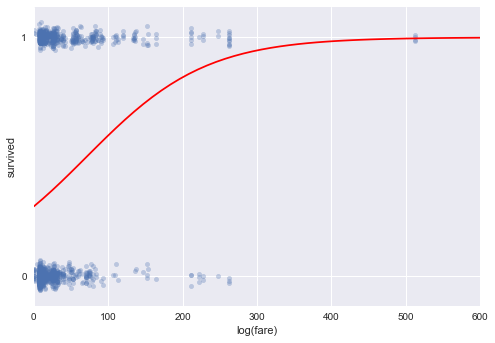

In [34]:
jitter = np.random.normal(scale=0.02, size=len(titanic))
axes = (titanic.assign(surv_jit=titanic.survived + jitter)
         .plot.scatter('fare', 'surv_jit', alpha=0.3))
axes.set_yticks([0,1])
axes.set_ylabel('survived')
axes.set_xlabel('log(fare)')

xvals = np.linspace(0, 600)
axes.plot(xvals, invlogit(b0+b1*xvals),c='red')
axes.set_xlim(0, 600)

As with our least squares model, we can easily fit logistic regression models in `scikit-learn`, in this case using the `LogisticRegression`.

In [35]:
from sklearn.cross_validation import train_test_split
X0 = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X0, y)

C:\Anaconda3\envs\ngcm2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The `LogisticRegression` model in scikit-learn employs a regularization coefficient `C`, which defaults to 1. The amount of regularization is lower with larger values of C.

Regularization penalizes the values of regression coefficients, while smaller ones let the coefficients range widely. Scikit-learn includes two penalties: a **l2** penalty which penalizes the sum of the squares of the coefficients (the default), and a **l1** penalty which penalizes the sum of the absolute values.

The reason for doing regularization is to let us to include more covariates than our data might otherwise allow. We only have a few coefficients, so we will set `C` to a large value.

In [36]:
from sklearn.linear_model import LogisticRegression

lrmod = LogisticRegression(C=1000)
lrmod.fit(X_train, y_train)

pred_train = lrmod.predict(X_train)
pred_test = lrmod.predict(X_test)

In [37]:
pd.crosstab(y_train, pred_train, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,588,28
1.0,295,70


In [38]:
pd.crosstab(y_test, pred_test, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,183,9
1.0,106,29


In [39]:
lrmod.fit(x[:, np.newaxis], y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
lrmod.coef_

array([[ 0.01245109]])

### Exercise: multivariate logistic regression

Which other variables might be relevant for predicting the probability of surviving the Titanic? Generalize the model likelihood to include 2 or 3 other covariates from the dataset.

In [ ]:
# Write your answer here

In [41]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [54]:
titanicdrop = titanic[titanic.fare.notnull()]

In [55]:
titanicdrop = titanicdrop[titanicdrop.age.notnull()]

In [66]:
x1,x2, y = titanicdrop[['age','fare', 'survived']].values.T

In [67]:
np.concatenate([x1[:, np.newaxis], x2[:, np.newaxis]],axis=1)

array([[  29.    ,  211.3375],
       [   0.9167,  151.55  ],
       [   2.    ,  151.55  ],
       ..., 
       [  26.5   ,    7.225 ],
       [  27.    ,    7.225 ],
       [  29.    ,    7.875 ]])

In [68]:
from sklearn.cross_validation import train_test_split
X0 = np.concatenate([x1[:, np.newaxis], x2[:, np.newaxis]],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X0, y)

In [70]:
from sklearn.linear_model import LogisticRegression

lrmod = LogisticRegression(C=1000)
lrmod.fit(X_train, y_train)

pred_train = lrmod.predict(X_train)
pred_test = lrmod.predict(X_test)

In [71]:
pd.crosstab(y_test, pred_test, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,137,19
1.0,79,27


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,pred_test)

0.62595419847328249

# Estimating Uncertainty: Bootstrapping

Resampling is the process of repeatedly **drawing subsamples** from a training dataset, and fitting a model to each sample with the goal of discovering additional properties or information about the model. For example, in a regression modeling context, we can fit a particular regression model to each sample, and observe **how the fits vary** among the samples. 

We will introduce **bootstrapping**, an important resampling method that is used in statistical and machine learning applications, particularly for **assessing** models and estimating the **precision** of parameter estimates.

## Bootstrapping

Parametric inference can be **non-robust**:

* inaccurate if parametric assumptions are violated
* if we rely on asymptotic results, we may not achieve an acceptable level of accuracy

Parmetric inference can be **difficult**:

* derivation of sampling distribution may not be possible

An alternative is to estimate the sampling distribution of a statistic *empirically* without making assumptions about the form of the population.

We have seen this already with the kernel density estimate.

### Non-parametric Bootstrap

The bootstrap is a resampling method discovered by [Brad Efron](http://www.jstor.org/discover/10.2307/2958830?uid=3739568&uid=2&uid=4&uid=3739256&sid=21102342537691) that allows one to approximate the true sampling distribution of a dataset, and thereby obtain estimates of the mean and variance of the distribution.

Bootstrap sample:

<div style="font-size: 120%;">  
$$S_1^* = \{x_{11}^*, x_{12}^*, \ldots, x_{1n}^*\}$$
</div>

$S_i^*$ is a sample of size $n$, **with** replacement.

In Python, we have already seen sampling. If we want to use NumPy for this, we can permute the column of names to obtain a sample:

We regard S as an "estimate" of population P

> population : sample :: sample : bootstrap sample

The idea is to generate replicate bootstrap samples:

<div style="font-size: 120%;">  
$$S^* = \{S_1^*, S_2^*, \ldots, S_R^*\}$$
</div>

Compute statistic $t$ (estimate) for each bootstrap sample:

<div style="font-size: 120%;">  
$$T_i^* = t(S^*)$$
</div>

We can bootstrap some confidence intervals for our logistic regression:

In [74]:
import numpy as np

R = 1000
boot_samples = np.empty((R, len(lrmod.coef_[0])))

for i in np.arange(R):
    boot_ind = np.random.randint(0, len(X0), len(X0))
    y_i, X_i = y[boot_ind], X0[boot_ind]
    
    lrmod_i = LogisticRegression(C=1000)
    lrmod_i.fit(X_i, y_i)

    boot_samples[i] = lrmod_i.coef_[0]

### Bootstrap Percentile Intervals

An attractive feature of bootstrap statistics is the ease with which you can obtain an estimate of *uncertainty* for a given statistic. We simply use the empirical quantiles of the bootstrapped statistics to obtain percentiles corresponding to a confidence interval of interest.

This employs the *ordered* bootstrap replicates:

$$T_{(1)}^*, T_{(2)}^*, \ldots, T_{(R)}^*$$

Simply extract the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles:

$$T_{[(R+1)\alpha/2]}^* \lt \theta \lt T_{[(R+1)(1-\alpha/2)]}^*$$

In [75]:
boot_samples.sort(axis=0)
boot_samples[:10]

array([[-0.03653189,  0.0075001 ],
       [-0.03516578,  0.00755119],
       [-0.03371307,  0.00834583],
       [-0.0329971 ,  0.00840411],
       [-0.03113706,  0.00852139],
       [-0.0311253 ,  0.00872909],
       [-0.03111209,  0.00874447],
       [-0.03009611,  0.0087748 ],
       [-0.02984693,  0.00877698],
       [-0.02975815,  0.00883711]])

In [76]:
boot_samples[-10:]

array([[-0.0057265 ,  0.01942761],
       [-0.00568994,  0.01945078],
       [-0.0056439 ,  0.01978618],
       [-0.00453732,  0.0198317 ],
       [-0.00425773,  0.01995968],
       [-0.00423375,  0.02045625],
       [-0.00412063,  0.02090078],
       [-0.0036983 ,  0.02125605],
       [-0.0026259 ,  0.02229404],
       [-0.00010205,  0.022456  ]])

In [77]:
boot_interval = boot_samples[[25, 975], :].T

In [78]:
boot_interval

array([[-0.02676503, -0.0076716 ],
       [ 0.00950549,  0.01865289]])

In [79]:
lrmod.coef_[0]

array([-0.02080257,  0.0152109 ])

Since we have estimated the expectation of the bootstrapped statistics, we can estimate the **bias** of T:

$$\hat{B}^* = \bar{T}^* - T$$


In [80]:
boot_samples.mean() - lrmod.coef_[0]

array([ 0.01921531, -0.01679816])

In [81]:
boot_var = ((boot_samples - boot_samples.mean()) ** 2).sum() / (R-1)
boot_var

0.00049939204080088869

### Bootstrap error

There are two sources of error in bootstrap estimates:

1. **Sampling error** from the selection of $S$.
2. **Bootstrap error** from failing to enumerate all possible bootstrap samples.

For the sake of accuracy, it is prudent to choose at least R=1000

### Exercise: Cervical dystonia bootstrap estimates

Use bootstrapping to estimate the mean of one of the treatment groups, and calculate percentile intervals for the mean.

In [ ]:
# Write your answer here